In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Executive Summary

# Identification of outliers

In [2]:
final_df = pd.read_csv('../Data/final_df.csv')

In [3]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 19 columns):
Country                   98 non-null object
Key                       98 non-null object
Continent                 98 non-null object
Refugees_2010             98 non-null float64
Refugees_2015             98 non-null float64
Murder Rate               98 non-null float64
Children_out_of_school    98 non-null float64
Government                98 non-null object
GDP($ in million)         98 non-null float64
Immigrants                98 non-null int64
Rain(ml)                  98 non-null float64
Density(pop/mi)           98 non-null float64
Population                98 non-null float64
Area(mi)                  98 non-null float64
Famine                    98 non-null float64
Female                    98 non-null float64
Male                      98 non-null float64
Civil                     98 non-null float64
Poverty                   98 non-null float64
dtypes: float64(14), int64(1)

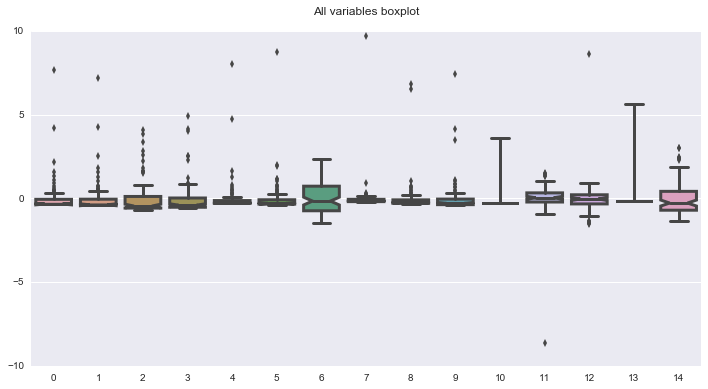

In [6]:
#Refugees_2010, Refugees_2015, Murder Rate, Children_out_of_school, GDP($ in million), Immigrants
#Rain(ml), Density(pop/mi), Population, Area(mi), Famine, Female, Male, Civil, Poverty
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ref2010 = (final_df['Refugees_2010'] - np.mean(final_df['Refugees_2010']))/ np.std(final_df['Refugees_2010'])
ref2015 = (final_df['Refugees_2015'] - np.mean(final_df['Refugees_2015']))/ np.std(final_df['Refugees_2015'])
murder  = (final_df['Murder Rate'] - np.mean(final_df['Murder Rate']))/ np.std(final_df['Murder Rate'])
child   = (final_df['Children_out_of_school'] - np.mean(final_df['Children_out_of_school'])) / np.std(final_df['Children_out_of_school'])
GDP     = (final_df['GDP($ in million)'] - np.mean(final_df['GDP($ in million)'])) / np.std(final_df['GDP($ in million)'])
immigrant = (final_df['Immigrants'] - np.mean(final_df['Immigrants']))/np.std(final_df['Immigrants'])
rain    = (final_df['Rain(ml)'] - np.mean(final_df['Rain(ml)'])) / np.std(final_df['Rain(ml)'])
density = (final_df['Density(pop/mi)'] - np.mean(final_df['Density(pop/mi)'])) / np.std(final_df['Density(pop/mi)'])
pop     = (final_df['Population'] - np.mean(final_df['Population'])) / np.std(final_df['Population'])
area    = (final_df['Area(mi)'] - np.mean(final_df['Area(mi)'])) / np.std(final_df['Area(mi)'])
famine  = (final_df['Famine'] - np.mean(final_df['Famine'])) / np.std(final_df['Famine'])
female  = (final_df['Female'] - np.mean(final_df['Female'])) / np.std(final_df['Female'])
male    = (final_df['Male'] - np.mean(final_df['Male'])) / np.std(final_df['Male'])
civil   = (final_df['Civil'] - np.mean(final_df['Civil'])) / np.std(final_df['Civil'])
poverty = (final_df['Poverty'] - np.mean(final_df['Poverty'])) / np.std(final_df['Poverty'])

ax = sns.boxplot(data=[ref2010, ref2015, murder, child, GDP, immigrant, rain, density, pop, area, famine, female, male, civil, poverty], 
                 orient='v', fliersize=5, linewidth=3, notch=True, saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

# Description of how you defined your variables

In [7]:
final_df.columns

Index([u'Country', u'Key', u'Continent', u'Refugees_2010', u'Refugees_2015',
       u'Murder Rate', u'Children_out_of_school', u'Government',
       u'GDP($ in million)', u'Immigrants', u'Rain(ml)', u'Density(pop/mi)',
       u'Population', u'Area(mi)', u'Famine', u'Female', u'Male', u'Civil',
       u'Poverty'],
      dtype='object')

The Country column looks into the country of the world, and the spelling is based on the UNHCR Refugee source

The Key column is a unique Key that is used in the folium mapping of the countries

The Continent column looks into the Continent of the Country

The Refugees_2010 is the number of Refugees in 2010 who find asylum in the mentioned country

The Refugees_2015 is the number of Refugees in 2015 who find asylum in the mentioned country

The Murder Rate is the number out of 1000 who were murdered in that country

Children out of school is the number of primary students who weren't in school out of 1000

Government is the type of government in the country

GDP is the GDP in US dollars in million of the country

Immigrants is the number of immigrants who find asylum in the country (could be for work, and other reasons)

Rain(ml) is the rainfall in ml for a year

Density(pop/mi) is the population density based on the population and area in mi^2 for the Country

Population is the population of the country

Area(mi) is the area of the country in mi

Famine is a binary value that determines if there was a famine in the past 15 years

Female is the percentage of female living in the country

Male is the percentage of male living in the country

Civil is a binary value that determines if there a civil war in the past 15 years

Poverty is the percentage of population living under the poverty line

# Discussion of model selection and implementation

# Description of any data pipeline(s)

# Visualizations & statistical analysis

# Interpretation of findings & relation to goals/success metrics

# Description of any source code used to conduct analysis

# Stakeholder recommendations & next steps for model/peers